<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2024/blob/main/Sleep_stages_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and install libraries

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
import os
import random

# Initialization

In [2]:
columns_to_read = ['1 LDF', '1 T', 'Sleep stages']
t_lower_bound = 35
big_file_no = 3
L_lower_threshold = 0
L_upper_threshold = 60
t_lower_threshold = 34

# Dictionary to map strings to integers
replacement_dict = {
    'W' : 0,
    'N2': 1,
    'N3': 2,
    'R' : 3
}

# Supplementary functions

Pre-processing of table data

In [3]:
def df_clean(df, columns_to_read=columns_to_read, replacement_dict=replacement_dict):
  # delete rows with nan values in a column
  df.dropna()
  # LDF
  df = df[df[columns_to_read[0]] > L_lower_threshold]
  df = df[df[columns_to_read[0]] < L_upper_threshold]
  # Temperature
  df = df[df[columns_to_read[1]] > t_lower_threshold]
  # the last column is for labels
  df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)
  return df

Visualization

In [4]:
def vis_data(df, columns_to_read=columns_to_read):
  k = 0
  # Create a figure with len(columns_to_download) subplots in one line
  fig, axes = plt.subplots(1, 5, figsize=(15, 3))
  # Plot the first three columns in the subplots
  for i in range(0, len(columns_to_read) + 2, 2):
      column = columns_to_read[k]
      k += 1
      sns.histplot(df[column], kde=True, ax=axes[i])
      axes[i].set_title(f'Distribution of {column}')
      axes[i].set_xlabel(column)
      axes[i].set_ylabel('Frequency')
      if i <= len(columns_to_read):
       sns.scatterplot(df[column],ax=axes[i+1])
       axes[i+1].set_title(f'Values of {column}')
       axes[i+1].set_xlabel('Sample ID')
       axes[i+1].set_ylabel('Feature value')
  # Adjust the layout and display the plots
  plt.tight_layout()
  plt.show()

# Download data

In [5]:
# GitHub repository URL
repo_url = "https://github.com/kotosham/sleep-stages"

# Raw files URLs
download_files = ['1.csv', '2.csv', '3-1.csv', '3-2.csv',
                  '4.csv', '5.csv', '6.csv', '7.csv']
# files_with_subfiles = ['3']

for i in download_files:
  file_url = f"{repo_url}/raw/main/{i}"
  # Download the file
  response = requests.get(file_url)
  # Check if the request was successful
  if response.status_code == 200:
      # Save the content to a local file
      with open(i, "wb") as file:
          file.write(response.content)
  else:
      print(f"Failed to download the file. Status code: {response.status_code}")

Concatinate parts of a big file

In [6]:
dfs = []
df_3_1 = pd.read_csv('3-1.csv', usecols=columns_to_read)
dfs.append(df_3_1)
df_3_2 = pd.read_csv('3-2.csv', usecols=columns_to_read)
dfs.append(df_3_2)
df3 = pd.concat(dfs, ignore_index=True)
df3 = df_clean(df3)
print(df3.head())

    1 LDF    1 T  Sleep stages
12   14.3  34.57             0
13   14.3  34.57             0
14   14.3  34.57             0
15   14.3  34.57             0
16   17.1  34.57             0


<ipython-input-3-ff7566f0b4b0>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)


Collect all the files into a list of data frames

In [7]:
num_volunteers = (len(download_files) - 1)
files = [1]*num_volunteers
for i in range(num_volunteers):
  if i + 1 != big_file_no:
    print(i)
    f"{repo_url}/raw/main/{i}"
    files[i] = pd.read_csv(f"{i+1}.csv", usecols=columns_to_read)
    files[i] = df_clean(files[i])
files[big_file_no - 1] = df3

0


<ipython-input-3-ff7566f0b4b0>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)
<ipython-input-3-ff7566f0b4b0>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)


1
3


<ipython-input-3-ff7566f0b4b0>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)


4


<ipython-input-3-ff7566f0b4b0>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)


5


<ipython-input-3-ff7566f0b4b0>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)


6


<ipython-input-7-59e274480387>:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  files[i] = pd.read_csv(f"{i+1}.csv", usecols=columns_to_read)
<ipython-input-3-ff7566f0b4b0>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)


Means and variances

In [8]:
alldf = pd.concat(files, axis=0)
features = alldf[[columns_to_read[0], columns_to_read[1]]].values
mean = features.mean(axis=0)
std = features.std(axis=0)
del[alldf, features]
mean, std

(array([24.31403385, 37.52051062]), array([4.77149417, 0.51476681]))

Visualize all the files

Volunteer 1
Number of samples 167007


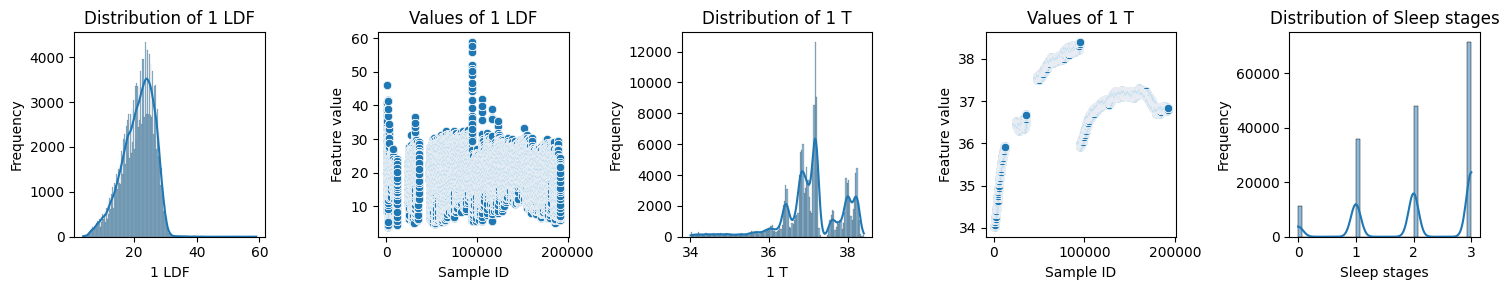

Volunteer 2
Number of samples 112848


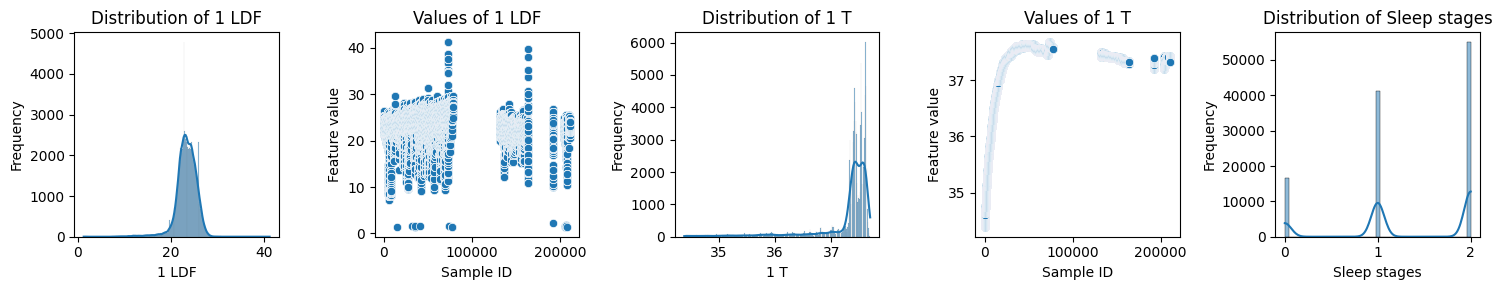

Volunteer 3
Number of samples 411736


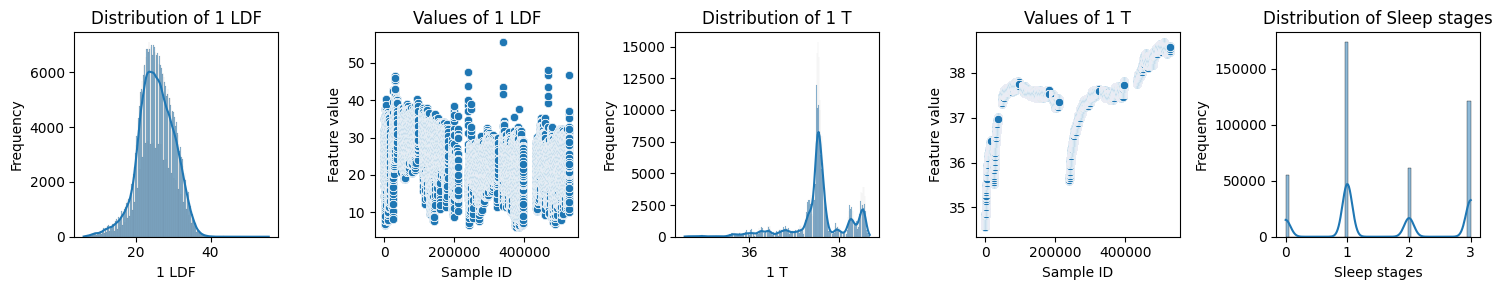

Volunteer 4
Number of samples 101844


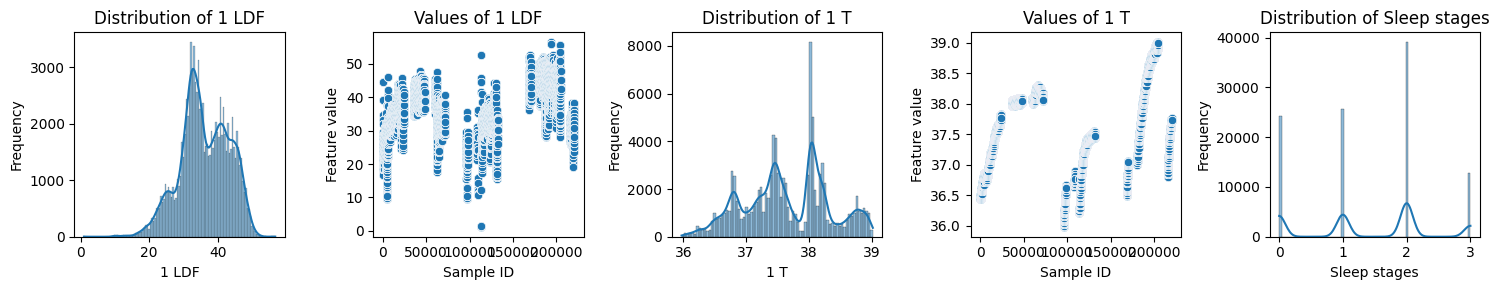

Volunteer 5
Number of samples 378409


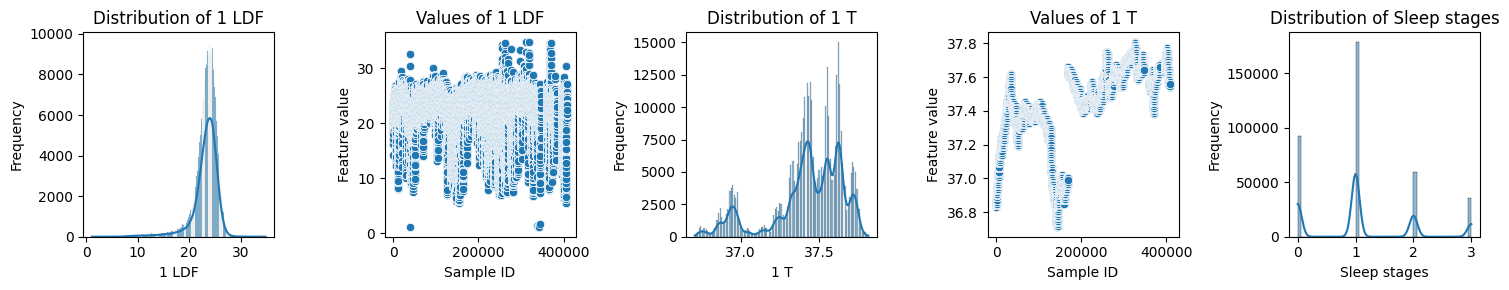

Volunteer 6
Number of samples 390907


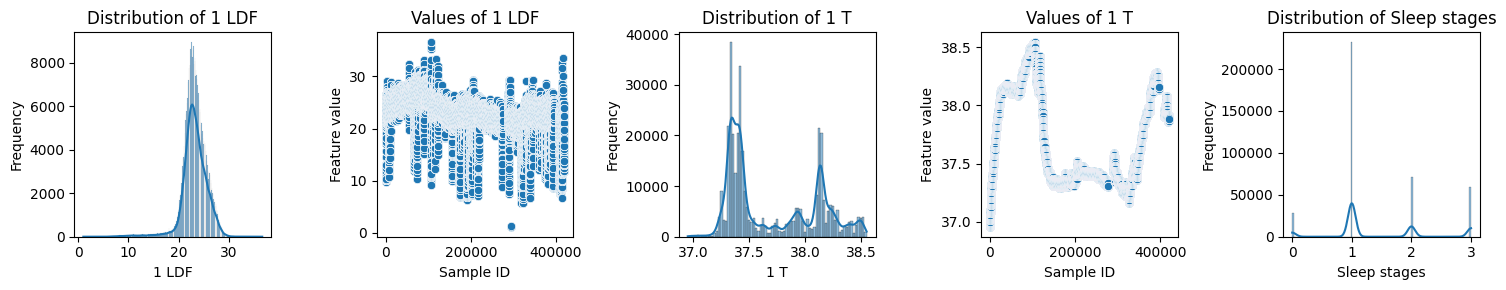

Volunteer 7
Number of samples 402669


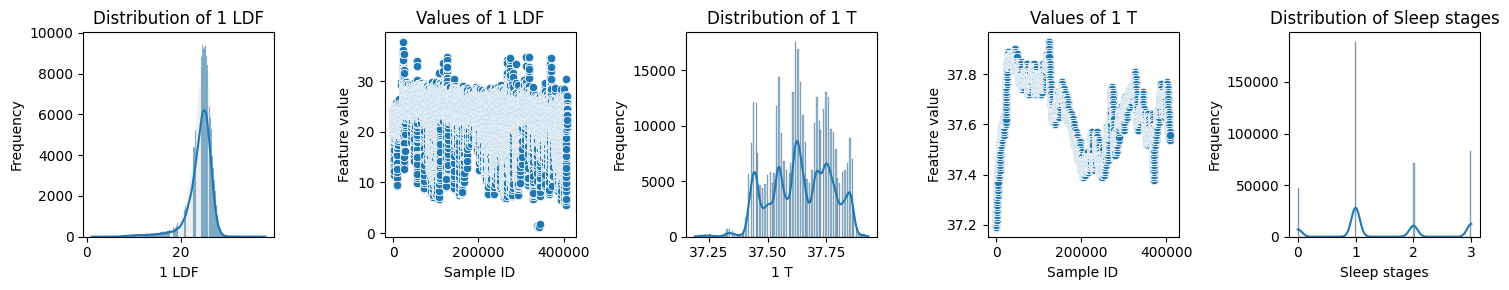

In [9]:
for i in range(num_volunteers):
  print(f'Volunteer {i+1}')
  print(f'Number of samples {len(files[i])}')
  vis_data(files[i])

# Dataset and Dataloader classes

In [11]:
class FragmentDataset(Dataset):
    def __init__(self, dataframe, fragment_length, means, stds, num_samples, transform=None):
        """
        Args:
            dataframe (pandas DataFrame): The input DataFrame.
            fragment_length (int): Length of the fragment to sample from each DataFrame.
            means (numpy array or list): Mean values for normalization.
            stds (numpy array or list): Standard deviation values for normalization.
            num_samples (int): Number of samples to generate.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.dataframe = dataframe.sort_values(by=dataframe.columns[-1])  # Sort by class
        self.fragment_length = fragment_length
        self.means = means
        self.stds = stds
        self.num_samples = num_samples
        self.transform = transform
        self.data = self.load_data()

    def load_data(self):
        """Load data by sampling fragments and ensuring uniform class distribution."""
        data = []
        class_column = self.dataframe.columns[-1]
        unique_classes = self.dataframe[class_column].unique()

        for _ in range(self.num_samples):
            # Randomly select a class
            selected_class = random.choice(unique_classes)
            class_data = self.dataframe[self.dataframe[class_column] == selected_class]

            # Sample a fragment of length `fragment_length`
            start_idx = random.randint(0, len(class_data) - self.fragment_length)
            fragment = class_data.iloc[start_idx:start_idx + self.fragment_length].values

            # Normalize the fragment
            fragment = (fragment[:, :-1] - self.means) / self.stds

            # Convert to PyTorch tensor
            fragment = torch.tensor(fragment, dtype=torch.float32)
            label = torch.tensor(int(selected_class), dtype=torch.long)

            data.append((fragment, label))

        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        fragment, label = self.data[idx]

        if self.transform:
            fragment = self.transform(fragment)

        return fragment, label

Create dataset and dataloader

Toy dataset

In [15]:
fragment_length = 2
num_samples = 4
df = pd.DataFrame({
        'sensor1': [1.0, 3.0, 5.0, 7.0, 9.0,  11.0],
        'sensor2': [2.0, 4.0, 6.0, 8.0, 10.0, 12.0],
        'class':   [0,   1,   1,   0,   0, 1]
        })

dataset = FragmentDataset(df, fragment_length, [0.0, 0.0], [1.0, 1.0], num_samples)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

for batch in dataloader:
    fragments, labels = batch
    print("Fragments:", fragments)
    print("Labels:", labels)

Fragments: tensor([[[ 1.,  2.],
         [ 7.,  8.]],

        [[ 7.,  8.],
         [ 9., 10.]],

        [[ 7.,  8.],
         [ 9., 10.]],

        [[ 3.,  4.],
         [ 5.,  6.]]])
Labels: tensor([0, 0, 0, 1])


In [16]:
# dataset = FragmentDataset(df, fragment_length, means, stds, num_samples)
# dataloader = DataLoader(dataset, batch_size=5, shuffle=True)